# Data cleaning: parsing dates

This notebook is an abstraction of the Kaggle's 5-Day Challenge.

The **goal** of this exercise is to clean date entries. 

The **evaluation** of the assignment will follow:

* Design process and thinking as a data engineer.
* Validation of knowledge on the different tools and steps throughout the process.
* Storytelling and visualisation of the insights.

Exercise **workflow**:

* Import dependencies & download dataset from [here](https://www.kaggle.com/usgs/earthquake-database/download).
* Explore incoherent date formats.
* Parse dates
* Validate parsed dates
    
Notes:

* Write your code into the `TODO` cells.
* Feel free to choose how to present the results throughout the exercise, what libraries (e.g., seaborn, bokeh, etc.) and/or tools (e.g., PowerBI or Tableau).

## Preamble
________

In [1]:
!pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

np.random.seed(0)

%run functions.ipynb

## Data
________

* Download the earthquakes dataset from [here](https://www.kaggle.com/usgs/earthquake-database/download)

In [3]:
### REPLACE WITH YOUR PATH
BASE_PATH = '/home/matias/data/earthquake'

df = build_df_from_csv('database.csv', BASE_PATH = BASE_PATH, clean_headers = False) 
df.head(3)

Reading: database.csv
shape: (23412, 21)
columns: ['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']
pc_number_of_null_values: 0.295817



,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic


## Dates
________

**TODO**

* Check the data type of the `date` column


In [4]:
df['Date'].dtypes

dtype('O')

**TODO**
* Convert the `date` column to `datetime`


In [5]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

**TODO**
* Select just the `day of the month` from the parsed date column

In [6]:
df['day_of_month'] = df['Date'].dt.day

**TODO**
* Plot the day of the month to validate the date parsing

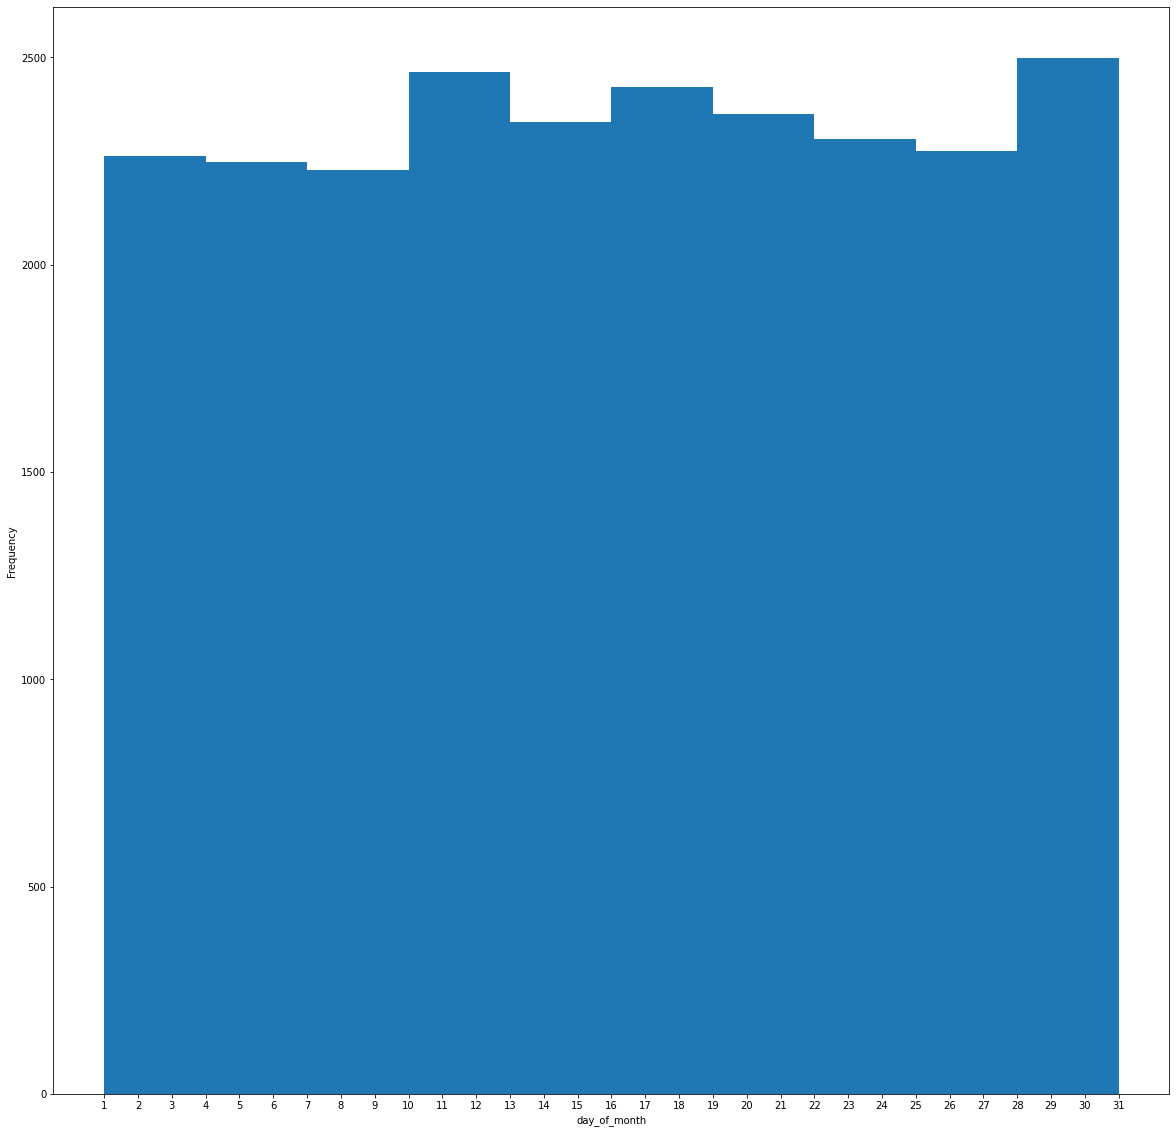

In [7]:
# Visual validation: we see that values varies strictly from 1 to 31
plot_histogram(df, 'day_of_month')